## Введение в теорию вероятностей. Домашнее задание

### Импорт библиотек

In [31]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

### **Задание 1.** 
Функция `coinToss` позволяет смоделировать процесс подбрасывания монетки любое количество раз. Это число задаётся параметром `number`. В результате функция выводит число испытаний и доли орлов и решек в последнем эксперименте, а также рисует график, на котором представлена суммарная доля выпавших орлов ко всем испытаниям с увеличением номера `n` от 1 до `number`.

1. Поэкспериментируйте и запустите функцию на разных значениях number. Проанализируйте поведение графика. Какими свойствами обладает кривая? 

2. К чему стремится доля орлов при увеличении числа испытаний? Как можно это объяснить?


In [32]:
def coinToss(number):
    recordList, proportionList, orli, reshki = [], [], 0, 0
    rangeList = range(1, number+1) #количество бросков
    for i in rangeList: 
        flip = random.randint(0, 1) #возвращает либо 0 (орёл), либо 1 (решка)
        if flip == 0:
            recordList.append("О")
            orli += 1
        else:
            recordList.append("Р")
            reshki += 1
        proportionList.append(orli/i)
    
    print("Число испытаний: "+ str(number))
    print("Доля орлов: " + str(orli/i) + " Доля решек: " + str(reshki/i))
    
    #Построение графика
    plt.figure(figsize=(40, 10), dpi=80)
    plt.plot(rangeList, proportionList)
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.xticks(np.arange(1, number+4, step=5))
    plt.yticks(np.arange(0, 1.1, step=0.1))

Число испытаний: 100
Доля орлов: 0.47 Доля решек: 0.53


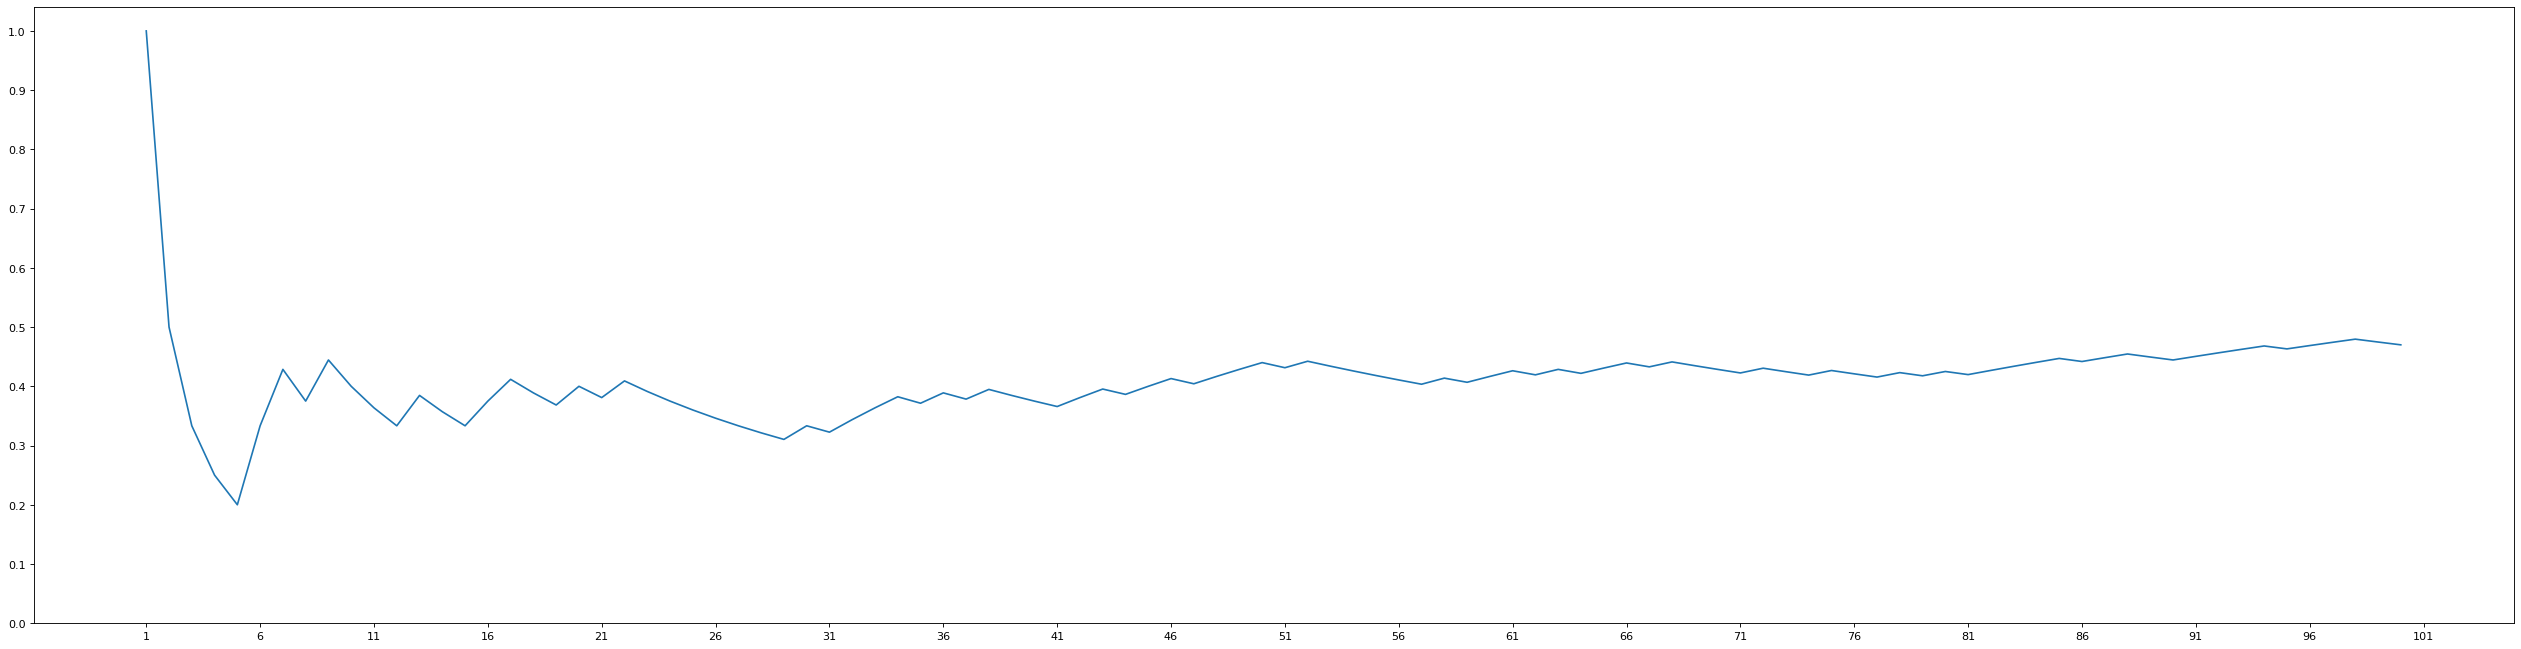

In [49]:
coinToss(100)

При возрастании x функция стабилизируется возле значения 0.5, что и логично (ибо закон больших чисел в форме Бернулли показывает: с вероятностью, сколь угодно близкой к единице, можно утверждать, что при достаточно большом числе опытов частота появления некоторого события как угодно мало отличается от его вероятности)
<p>
Один из вариантов физической интерпретации данной функции: доля выпавших орлов при увеличении числа подбрасывания монетки стремится к 0.5

### **Задание 2.** 
Функция `diceLoss` моделирует бросок двух игральных кубиков некоторое количество раз (`number`). В результате выводится вероятность того, что сумма на кубиках будет больше параметра функции `k` (считается доля выпадений, на которых сумма превысит `k`, относительно всех сумм).

1. Поэкспериментируйте с разными `number` и `k`. К каким значениям будет стремиться вероятность при фиксированном `k` и больши́х `number`? Что будет, если брать `k` = 6, 8? Как полученные вероятности будут связаны с теоретическими вероятностями?

2. К чему будет стремиться общая сумма бросков, поделённая на их количество? К чему стремится средняя разность текущего броска и полученного среднего значения? Напишите код на Python на основе исходной функции и объясните результат.


In [34]:
def diceToss(number, k):
    sumList,recordList= [], [] 
    rangeList = range(1, number+1)

    for i in rangeList: 
        flip1 = random.randint(1,6) #возвращает число от 1 до 6
        flip2 = random.randint(1,6)
        flipsum = flip1 + flip2
        sumList.append(flipsum)
        recordList.append([flip1, flip2])
    
    print('Вероятность, что сумма на кубиках превысит ' +str(k) +' при ' + str(number) + 
          ' испытаниях: ' + str(sum([x > k for x in sumList])/number))

In [44]:
diceToss(10000, 6)
diceToss(10000, 8)

Вероятность, что сумма на кубиках превысит 6 при 10000 испытаниях: 0.5893
Вероятность, что сумма на кубиках превысит 8 при 10000 испытаниях: 0.2755


In [42]:
print(round(21/36, 4), round(10/36, 4))

0.5833 0.2778


При увеличении числа попыток количество выпадений значений будет приближаться к их вероятностям
<p>
для k = 6, например, это будет p(7) + p(8) + p(9) + p(10) + p(11) + p(12) = 6/36 + 5/36 + 4/36 + 3/36 + 2/36 + 1/36 = 21/36 = 0.5833
<p>
для k = 8, например, это будет P(9) + p(10) + p(11) + p(12) = 4/36 + 3/36 + 2/36 + 1/36 = 10/36 = 0.2778
<p>
Ожидания подтвердились в ходе эксперимента

In [58]:
def diceToss(number):
    toss_list = []
    sum_value = 0

    for i in range(1, number + 1): 
        flipsum = random.randint(1,6) + random.randint(1,6)
        toss_list.append(flipsum)
        sum_value += flipsum
   
    print("\nЧисло бросков:", number)

    #К чему будет стремиться общая сумма бросков, поделённая на их количество
    avg_value = sum_value / number
    print('Отношение суммы к числу бросков =', avg_value)
        
    #к чему стремится средняя разность текущего броска и полученного среднего значения
    diff_with_avg_list = [toss - avg_value for toss in toss_list]

    avg_diff_with_avg = sum(diff_with_avg_list) / len(diff_with_avg_list)
    print("Средняя разность со средним =", avg_diff_with_avg)

diceToss(1)
diceToss(2)
diceToss(3)
diceToss(10)
diceToss(100)
diceToss(1000)
diceToss(10000)


Число бросков: 1
Отношение суммы к числу бросков = 5.0
Средняя разность со средним = 0.0

Число бросков: 2
Отношение суммы к числу бросков = 5.0
Средняя разность со средним = 0.0

Число бросков: 3
Отношение суммы к числу бросков = 8.0
Средняя разность со средним = 0.0

Число бросков: 10
Отношение суммы к числу бросков = 7.2
Средняя разность со средним = -1.7763568394002506e-16

Число бросков: 100
Отношение суммы к числу бросков = 6.65
Средняя разность со средним = -3.552713678800501e-16

Число бросков: 1000
Отношение суммы к числу бросков = 6.928
Средняя разность со средним = -4.263256414560601e-17

Число бросков: 10000
Отношение суммы к числу бросков = 7.0025
Средняя разность со средним = 1.5121237595394631e-15


### Вывод
#### К чему будет стремиться общая сумма бросков, поделённая на их количество?
При увеличении числа опытов частота выпадения значений будет приближаться к их вероятностям. И, как следствие, общее значение суммы бросков при проведении n экспериментов будет приближаться к величине n * (2 * (1/36) + 3 * (2/36) + ... + 12 * (1/36)) = n * 7.
То есть, общая сумма бросков, поделённая на их количество, должна приближаться к 7
<p>
Экспериментально этот факт успешно подтвердился

#### К чему стремится средняя разность текущего броска и полученного среднего значения?
 По опредению: Sum(по всем i) ( x(i)-x(ср) ) = 0, то есть независимо от числа экспериментов сумма разностей конкретного броска и среднего значения равна нулю (с машинной погрешностью).
<p>
При увеличении числа экспериментов эта величина останется нулевой.
Экспериментально это ожидание успешно подтвердилось

### *Задание 3.*
 
Как было рассказано в уроке, метод Монте-Карло — это серия численных методов, позволяющих моделировать случайные процессы для изучения некоторого явления. Один из способов применения метода Монте-Карло заключается в измерении различных площадей. Если рассмотреть географическую карту и случайным образом равномерно разбросать на ней точки с произвольными координатами, то окажется, что количество точек в определённом регионе будет пропорционально площади этого региона. Следующая задача как раз на эту тему. 

Ниже представлен код, который делает следующее. На отрезке от −1 до 1 берутся два значения, `x` и `y`, из которых строится точка на плоскости с координатами (x, y). Если такая точка попадает внутрь единичного круга с центром в нуле, то такая точка отмечается синим цветом, в противном случае — красным. Количество точек задаётся параметром `n`.

Вызовите функцию для разных `n`. К чему будет стремиться доля синих точек? Как это связано с площадями геометрических фигур? Проанализируйте, как меняется доля синих точек с ростом количества точек, и сравните её с теоретическим значением площади.


In [45]:
def plot_circle(n):
  x = 2 * np.random.random(int(n)) - 1
  y = 2 * np.random.random(int(n)) - 1
  insideX, insideY  = x[(x*x+y*y)<=1],y[(x*x+y*y)<=1] #координаты точек внутри
  outsideX, outsideY = x[(x*x+y*y)>1],y[(x*x+y*y)>1] #координаты точек снаружи
  
  print('Число точек внутри круга:', len(insideX))
  print('Число точек снаружи круга:', (len(outsideX)))
  print('Доля точек внутри круга:', len(insideX)/(len(outsideX)+len(insideX)))
  
  #Построение графика
  fig, ax = plt.subplots(1)
  ax.scatter(insideX, insideY, c='b', alpha=0.6, edgecolor=None)
  ax.scatter(outsideX, outsideY, c='r', alpha=0.7, edgecolor=None)
  ax.set_aspect('equal')
  fig.show()

Число точек внутри круга: 1982
Число точек снаружи круга: 518
Доля точек внутри круга: 0.7928


C:\Users\ggyak\AppData\Local\Temp\ipykernel_9860\2866001636.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


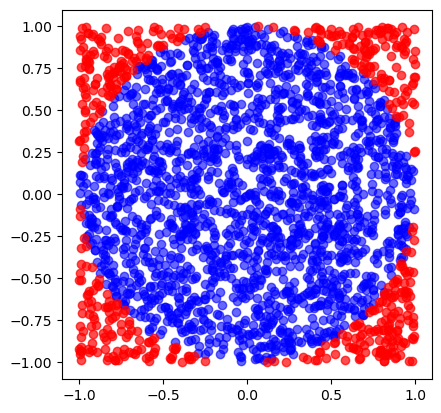

In [46]:
plot_circle(2500)

In [47]:
math.pi / 4

0.7853981633974483

In [48]:
def eval_Pi(n):
  x = 2 * np.random.random(int(n)) - 1
  y = 2 * np.random.random(int(n)) - 1
  insideX, insideY  = x[(x*x+y*y)<=1],y[(x*x+y*y)<=1] #координаты точек внутри
  outsideX, outsideY = x[(x*x+y*y)>1],y[(x*x+y*y)>1] #координаты точек снаружи
  
  print('\nМонте-Карло, число точек в эксперименте:', n)
  print('Доля точек внутри круга:', len(insideX)/(len(outsideX)+len(insideX)))
  print('Приближение числа PI в ходе эксперимента:', 4 * len(insideX)/(len(outsideX)+len(insideX)))
  

eval_Pi(5)
eval_Pi(50)
eval_Pi(500)
eval_Pi(5000)
eval_Pi(50000)
eval_Pi(500000)


Монте-Карло, число точек в эксперименте: 5
Доля точек внутри круга: 0.8
Приближение числа PI в ходе эксперимента: 3.2

Монте-Карло, число точек в эксперименте: 50
Доля точек внутри круга: 0.76
Приближение числа PI в ходе эксперимента: 3.04

Монте-Карло, число точек в эксперименте: 500
Доля точек внутри круга: 0.746
Приближение числа PI в ходе эксперимента: 2.984

Монте-Карло, число точек в эксперименте: 5000
Доля точек внутри круга: 0.7928
Приближение числа PI в ходе эксперимента: 3.1712

Монте-Карло, число точек в эксперименте: 50000
Доля точек внутри круга: 0.78316
Приближение числа PI в ходе эксперимента: 3.13264

Монте-Карло, число точек в эксперименте: 500000
Доля точек внутри круга: 0.785622
Приближение числа PI в ходе эксперимента: 3.142488
